<a href="https://colab.research.google.com/github/Regis0323/Module_2/blob/main/Rurangwa_Assignment_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #004B87; padding: 20px; text-align: center; border-radius: 10px; color: white; font-family: Arial, sans-serif; margin: auto; width: 80%;">
    <h1>IABE Data Science Certificate Module 2 Assignment</h1>
    <h2>RURANGWA IRADUKUNDA Jean-François Régis</h2>
    <h3>May 12, 2025</h3>
    <p>Email : jeanfrancoisregis.rurangwairadukunda@axa.be</p>
</div>


## Table of contents
1. [Introduction](#Introduction)<br />
2. [Data Exploration and Preprocessing](#Data_treatment)<br />
3. [Decision Trees In Classification And Regression](#Linear_Models)<br />
4. [Ensemble Methods: Bagging And Regression](#Testing)<br />
  4.1. [Bagging Method](#GLM)<br />
  4.2. [Regression Methods](#Regularization)<br />
5. [Neural Networks](#Clustering)<br />
6. [Conclusion](#Conclusion)<br />


# 1. Introduction<a name="Introduction"></a>


Following the 'Actuarial Data Scientist' program offered by the Belgian association of actuaries (IABE), we are tasked with an assignment that builds on the foundational concepts learned in the second module (out of three).
<br/>
This assignment involves analyzing the 'Medical Cost Personal Datasets' obtained from Kaggle. The dataset comprises various demographic and health-related features, along with the medical costs incurred by each individual.
<br/>

In this analysis, we will focus on employing decision trees for both classification and regression tasks, as well as exploring ensemble tree methods and introductory neural networks.
<br/>
The objective is to leverage these techniques to gain insights into the factors influencing medical costs and to develop predictive models that can effectively estimate these costs based on the available features.

#2. Data Exploration and Preprocessing<a name="Data_treatment"></a>

We start by importing different packages that will be of use throughout the analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf

!git clone https://github.com/Regis0323/Module_2.git
!pip install scikit-fuzzy

Cloning into 'Module_2'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 54 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 10.61 MiB | 10.28 MiB/s, done.
Resolving deltas: 100% (27/27), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.2 MB/s eta 0:00:00


Then we can proceed importing the dataset and having a small look of the data alongside the different types of the variables.

In [2]:
MedCost_data = pd.read_csv("/content/Module_2/insurance.csv")
display(MedCost_data.head())
print(MedCost_data.dtypes.value_counts())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


object     3
int64      2
float64    2
Name: count, dtype: int64


Our dataset is composed of 7 columns, of which 3 are categorized as 'object', 2 as 64-bit 'integer' (int64) and 2 as 64-bit 'floating-point' (float64) numbers.
<br>
We shall now check for missing and/or duplicated values before treating them accordingly if any.

In [3]:
#Potential missing values
Missing_Values=MedCost_data.isna().sum()
print(Missing_Values)

#Potential duplicated values
Duplicated_Values=MedCost_data[MedCost_data.duplicated(keep=False)]
print(Duplicated_Values)
  #Treating duplicated values
MedCost_data_cleaned=MedCost_data.drop_duplicates(keep='first')

#Information about the new cleaned dataset
MedCost_data_cleaned.info()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


After this first check, we can see that there are no missing values however we have one set of duplicates.
<br/>
Having treated the duplicated values, the new dataframe 'MedCost_data_cleaned' is composed of 7 columns and 1337 lines.
<br/>
The next step consists of converting categorical variables into suitable formats using the one-hot encode method which will enable our models (decision trees, ensemble methods, and neural networks) to effectively learn from the data without introducing any misleading ordinal relationships.

In [4]:
Clean_Data = pd.get_dummies(MedCost_data_cleaned, columns=['region','sex', 'smoker'], drop_first=True)

print(Clean_Data)

      age     bmi  children      charges  region_northwest  region_southeast  \
0      19  27.900         0  16884.92400             False             False   
1      18  33.770         1   1725.55230             False              True   
2      28  33.000         3   4449.46200             False              True   
3      33  22.705         0  21984.47061              True             False   
4      32  28.880         0   3866.85520              True             False   
...   ...     ...       ...          ...               ...               ...   
1333   50  30.970         3  10600.54830              True             False   
1334   18  31.920         0   2205.98080             False             False   
1335   18  36.850         0   1629.83350             False              True   
1336   21  25.800         0   2007.94500             False             False   
1337   61  29.070         0  29141.36030              True             False   

      region_southwest  sex_male  smoke

We now have a dataset '**Clean_Data**' of 1337 lines and 9 columns which is treated to the max (removal of duplicates and treatment of categorical variables), clean and is ready to be used in different models.

# 3. Decision Trees In Classification And Regression<a name="Linear_Models"></a>

In this section we shall start by training a decision tree classifier to predict whether a person is a smoker and evaluate the classification performance using appropriate evaluation criteria.

Then we shall train a decision tree regressor to predict the insurance charges followed by the regression performance using appropriate metrics as well.

Finally we shall discuss the interpretability of decision trees and identify which features appear most influential.


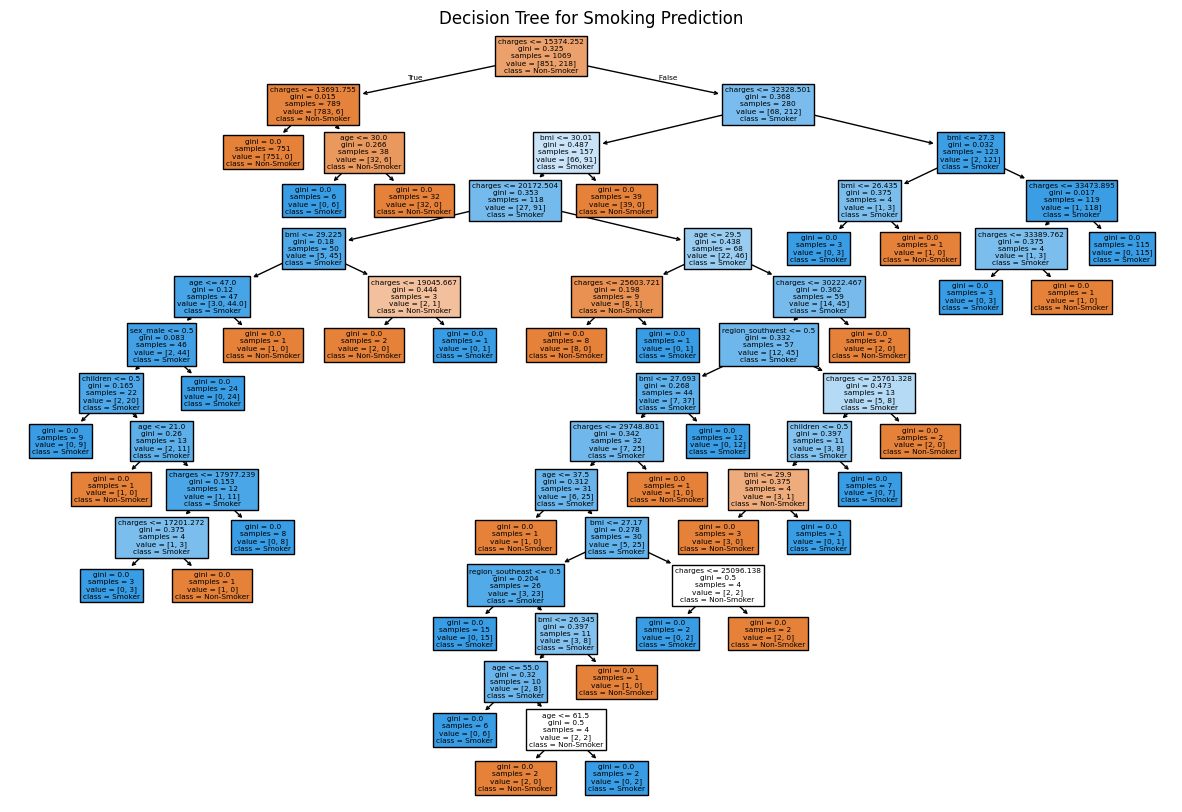

Accuracy: 0.95


In [5]:
##  Decision tree classifier to predict whether a person is a smoker (classification) ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Classification
classifier = DecisionTreeClassifier(random_state=23)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Visualization of the decision Tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['Non-Smoker', 'Smoker'], filled=True)
plt.title('Decision Tree for Smoking Prediction')
plt.show()

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Here we trained the decision tree classifier on 80% of the entire dataset and tested it on 20% which gave us an accuracy of 95%, having used original settings and no pruning.

We shall now use a the 'GridSearch' method to find the right parameters to prune the tree as to increase the test accuracy.

In [6]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Grid search initialization
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=23), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Prediction using the best estimator
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

# Accuracy calculation
Best_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {Best_accuracy:.2f}')

Best parameters: {'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9692673992673992
Accuracy with best parameters: 0.97


Having used different values for the parameters on a training set of 73% of the entire dataset and tested it on 27%, which is a good split for our dataset of 1337 lines and 9 columns to ensure no under and/or overfitting, we got as a result the following parameters: NO max_depth, a maximum of 10 leaf nodes, a minimum of 5 leafs' samples and a minimum of 2 split samples.

The results are remarquable since we have the cross-validation accuracy equal to 97% and the accuracy on the test set is 97% as well showing us that what we did on the training set is remarquably reproduced on the test set as well.

We shall now plot it.

Accuracy with best parameters: 0.97
            Feature  Importance
3           charges    0.853658
1               bmi    0.114544
0               age    0.031798
2          children    0.000000
4  region_northwest    0.000000
5  region_southeast    0.000000
6  region_southwest    0.000000
7          sex_male    0.000000
Decision path for the instance:
Node 0:
  Feature: charges <= 15374.25
Node 1:
  Feature: charges <= 14452.75
Node 11:
  Feature: region_southwest <= -2.00


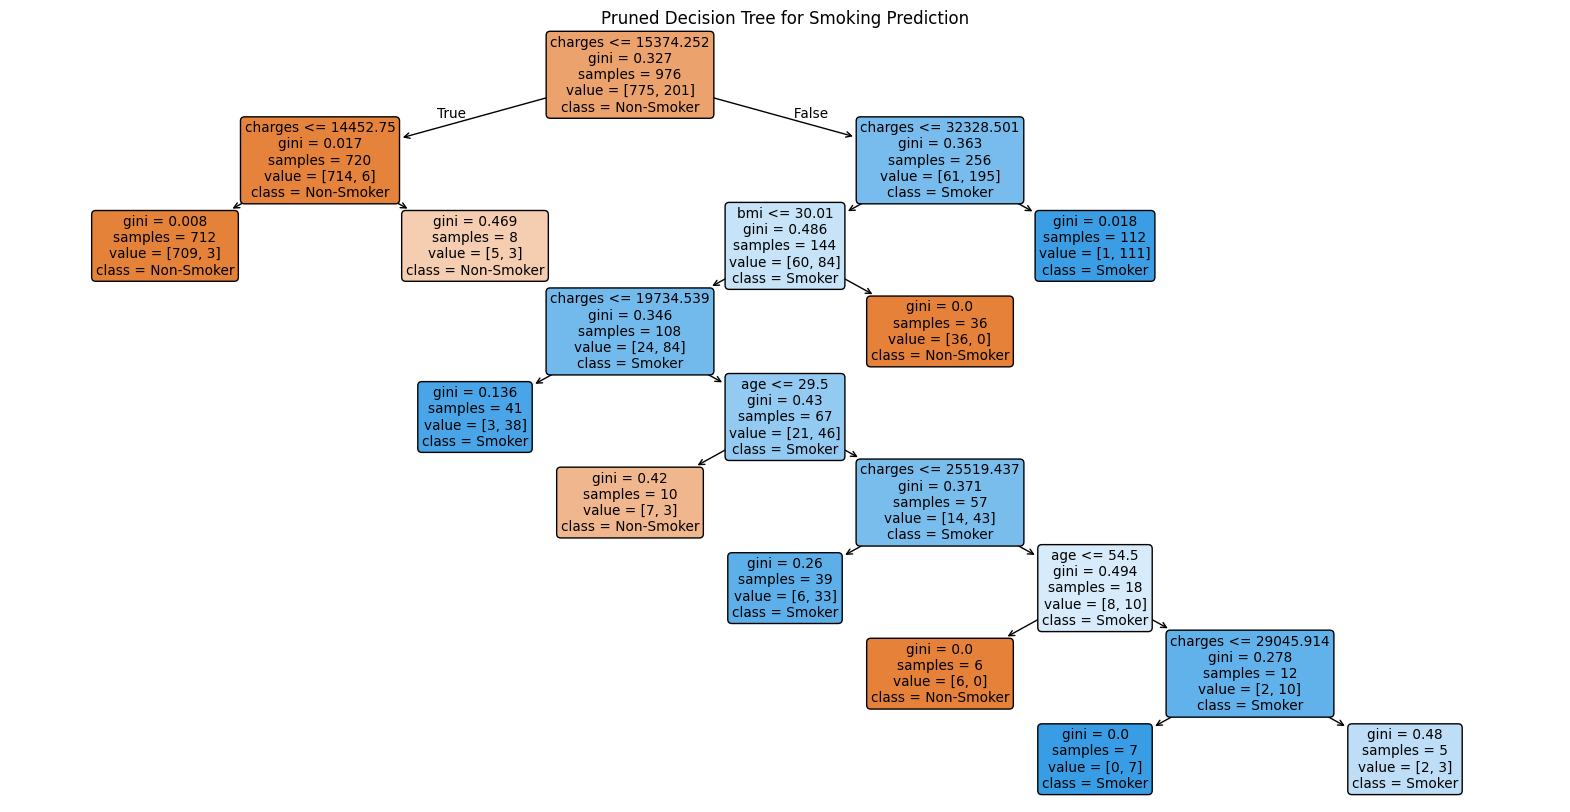

In [7]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Best defined parameters
best_params = {
    'max_depth': None,
    'max_leaf_nodes': 10,
    'min_samples_leaf': 5,
    'min_samples_split': 2
}

# Classification
classifier = DecisionTreeClassifier(random_state=23, **best_params)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy:.2f}')

# Feature importance
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Path decision
def plot_decision_path(instance):
    instance_reshaped = instance.values.reshape(1, -1)
    decision_path = classifier.decision_path(instance_reshaped)
    node_indicator = decision_path.indices
    feature = classifier.tree_.feature
    threshold = classifier.tree_.threshold

    print("Decision path for the instance:")
    for node_id in node_indicator:
        if node_id >= 0:
            print(f"Node {node_id}:")
            print(f"  Feature: {X.columns[feature[node_id]]} <= {threshold[node_id]:.2f}")
        else:
            print(f"Leaf node reached: {node_id}")

plot_decision_path(X_test.iloc[0])

# Pruned decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['Non-Smoker', 'Smoker'], filled=True, rounded=True, impurity=True)
plt.title('Pruned Decision Tree for Smoking Prediction')
plt.show()

These results indicate that our decision tree model is performing exceptionally well. Charges are the primary driver of predictions, followed by BMI, while other features have little to no impact. The model's high accuracy and consistent cross-validation scores suggest that it generalizes well to unseen data.

We shall now predict the insurance charges by training a decision tree regressor.

In [8]:
##  Decision tree regression to predict the insurance charges  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'max_leaf_nodes': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=23),
    param_distributions=param_grid,
    n_iter=100,  # Number of combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=23
)

random_search.fit(X_train, y_train)

print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation MSE:", -random_search.best_score_)

Best parameters from Randomized Search: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_depth': 7}
Best cross-validation MSE: 22494112.491937943


Having used different values for the parameters on a training set of 70% of the entire dataset and tested it on 30%, we got as a result the following parameters: a maximum depth of 7, a maximum of 10 leaf nodes, a minimum of 2 leafs' samples and a minimum of 10 split samples.

The best mean squared error MSE using those parameters is estimated at roughly 22.5 million. We shall now plot it.

Mean Squared Error: 23754598.08
R-squared: 0.84
            Feature  Importance
7        smoker_yes    0.725326
1               bmi    0.173178
0               age    0.095748
2          children    0.005748
3  region_northwest    0.000000
4  region_southeast    0.000000
5  region_southwest    0.000000
6          sex_male    0.000000
Interpreting decision path for the first instance in the test set:
Decision path for the instance:
Node 0:
  Feature: smoker_yes <= 0.50
Node 1:
  Feature: age <= 42.50
Node 6:
  Feature: age <= 54.50
Node 11:
  Feature: sex_male <= -2.00


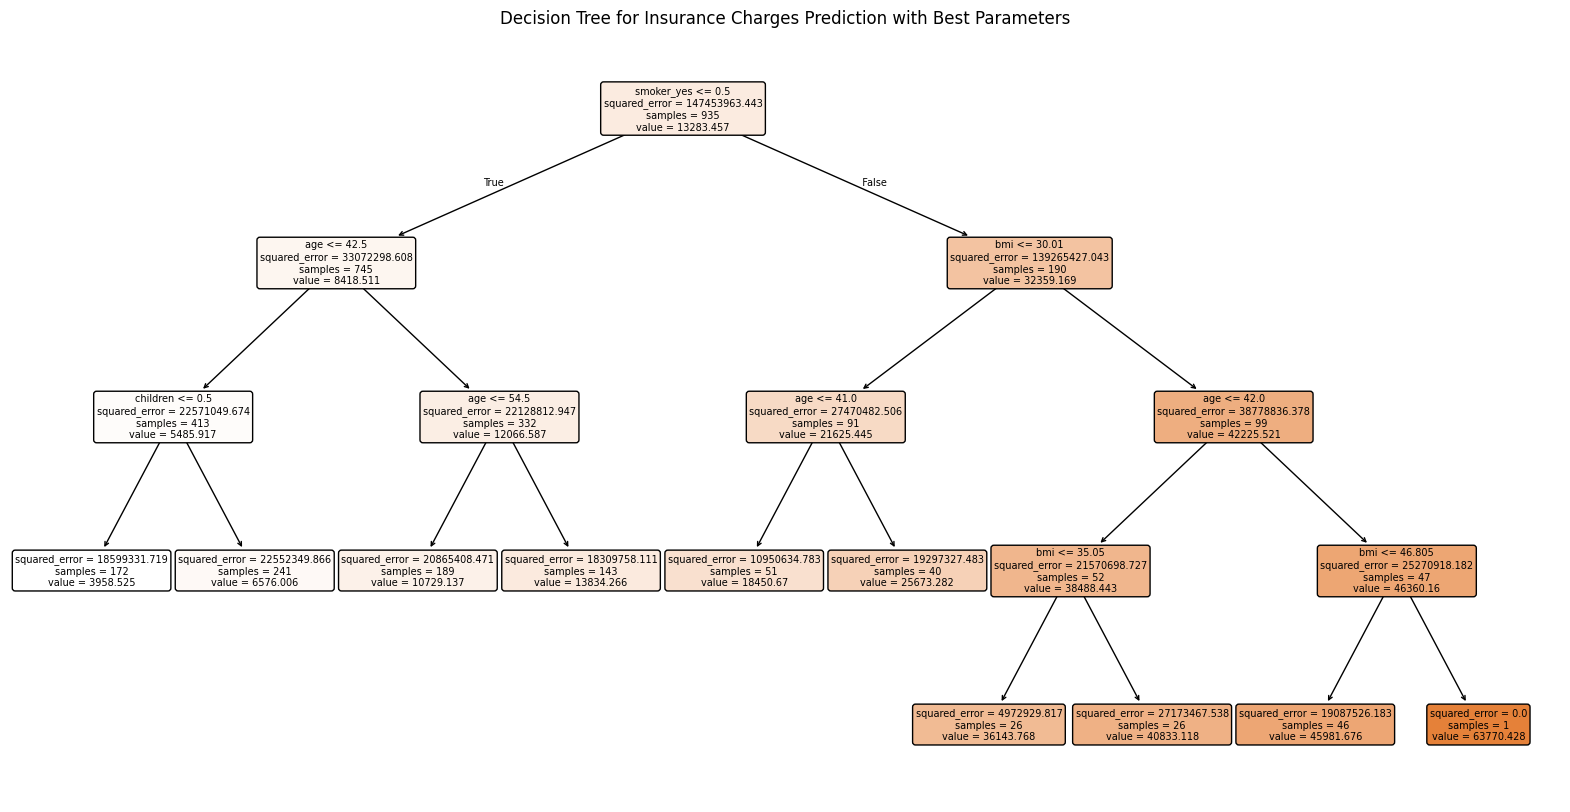

In [9]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Best parameters from Randomized Search
best_params = {
    'max_depth': 7,
    'max_leaf_nodes': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 10
}

# Fitting the decision tree regressor with the best parameters
regressor = DecisionTreeRegressor(random_state=23, **best_params)
regressor.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Path decision
def plot_decision_path(instance):
    instance_reshaped = instance.values.reshape(1, -1)
    decision_path = regressor.decision_path(instance_reshaped)
    node_indicator = decision_path.indices
    feature = regressor.tree_.feature
    threshold = regressor.tree_.threshold

    print("Decision path for the instance:")
    for node_id in node_indicator:
        if node_id >= 0:
            print(f"Node {node_id}:")
            print(f"  Feature: {X.columns[feature[node_id]]} <= {threshold[node_id]:.2f}")
        else:
            print(f"Leaf node reached: {node_id}")

print("Interpreting decision path for the first instance in the test set:")
plot_decision_path(X_test.iloc[0])

# Enhanced decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          impurity=True,
          fontsize=7)
plt.title('Decision Tree for Insurance Charges Prediction with Best Parameters')
plt.show()

The results above indicate that the model performs reasonably well in explaining insurance charges, with smoking status being the most influential factor. The MSE might be a little high but the r-squared value, 84%, shows that the model is quite well explained.

The interpretability of decision trees allows for a straightforward understanding of how different features influence predictions.
The analysis done above shows that smoking status, charges, BMI, and age are the most influential features in determining whether a person is a smoker and predicting insurance charges, respectively. This insight can guide further feature selection, model refinement, and decision-making processes in applications similar to the one we have in an insurance company case but the pruning and parameter fitting is crucial to avoid over and/or underfitting.

# 4. Ensemble Methods: Bagging And Regression<a name="Testing"></a>

In this section we shall use the same 'Clean_data' dataset and, for both the classification (smoker vs non-smoker) and the regression (charges), firstly train a Random Forest (bagging method) before training a boosted model (XGBoost in this case for its accuracy and robustness).

We shall as well compare the results with the decision trees and finish by providing insights on hyperparameters (e.g., number of trees, learning rate) and how they affect model performance and training time.

## 4.1. Bagging Method<a name="GLM"></a>

In [10]:
##  Random Forest to predict whether a person is a smoker (classification)  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Parameter grid definition
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search initialization
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=23),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=23
)

random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Best parameters from Randomized Search: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}
Best cross-validation accuracy: 0.9672265829408687


Having used different values for the parameters on a training set of 73% of the entire dataset and tested it on 27%, we got as a result the following parameters: 50 as the number of estimators, a minimum split's samples of 5, a minimum of 2 leaf's samples, a maximum depth of 15 and the maximum features follow a 'log2' function.

This results to a high cross-validation accuracy of 97% and we shall now plot it.

Accuracy with best parameters: 0.96
            Feature  Importance
3           charges    0.833668
1               bmi    0.079220
0               age    0.049735
2          children    0.016012
7          sex_male    0.007422
5  region_southeast    0.006131
4  region_northwest    0.004563
6  region_southwest    0.003250


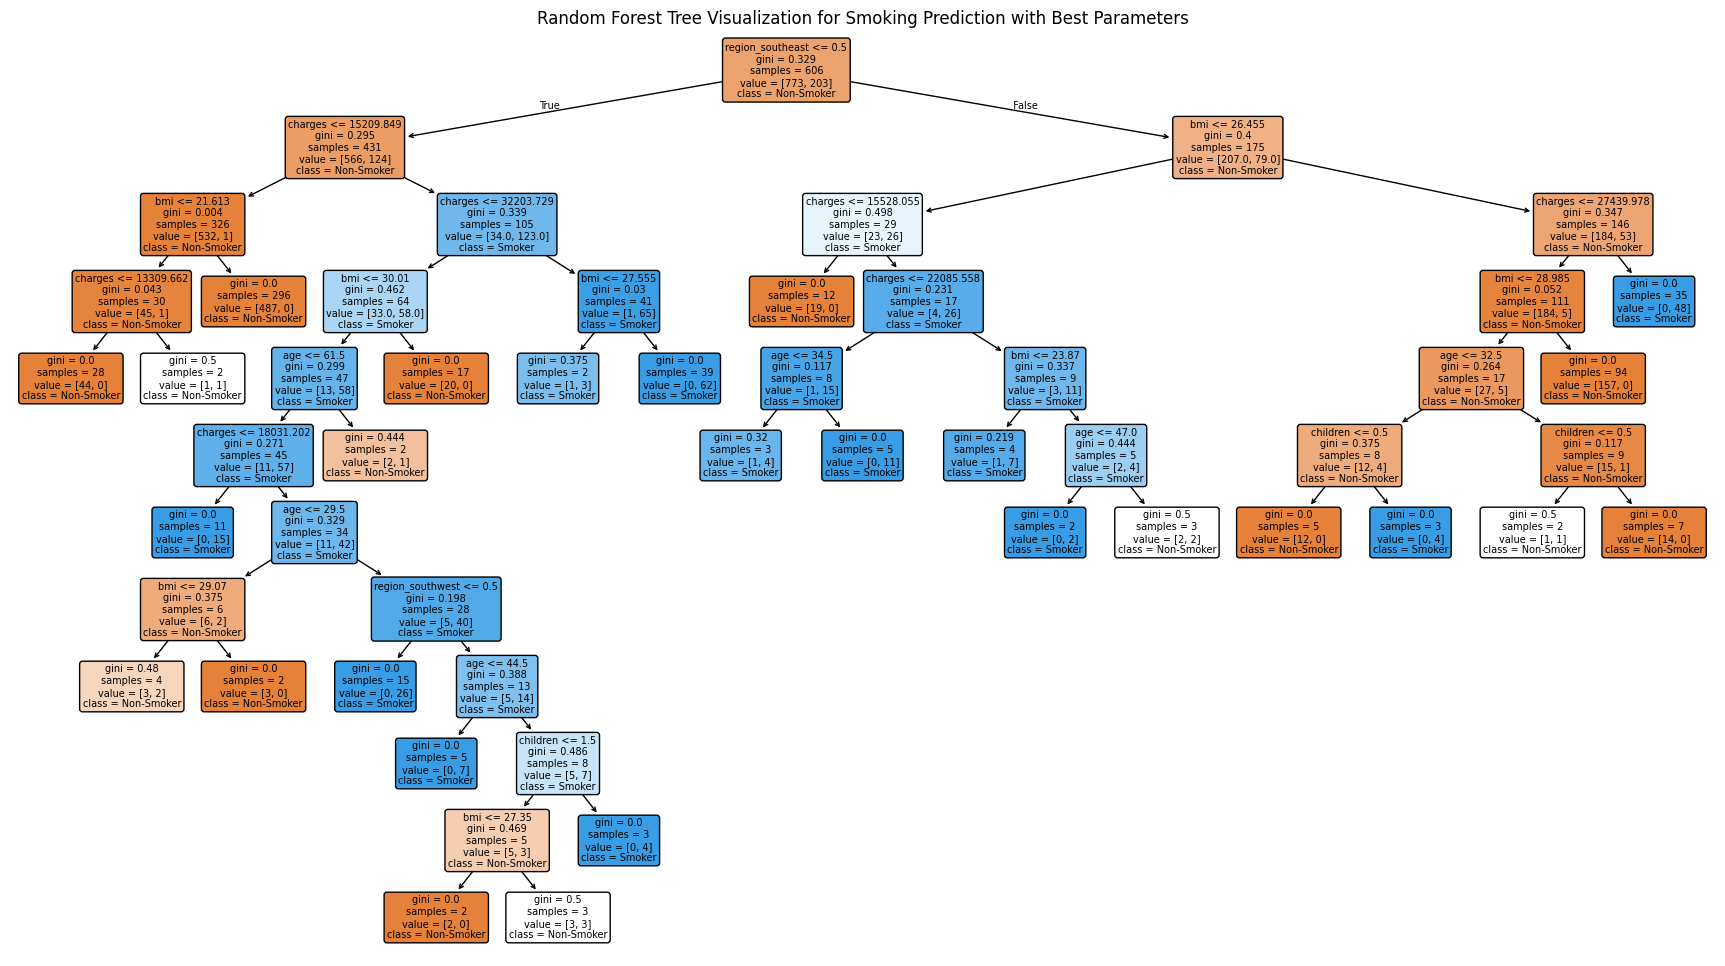

In [11]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Best parameters from Randomized Search
best_params = {
    'n_estimators': 50,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'log2'
}

# Fitting the Random Forest classifier with the best parameters
classifier = RandomForestClassifier(random_state=23, **best_params)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy:.2f}')

# Feature importance
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Random Forest visualization for classification
plt.figure(figsize=(22, 12))
plot_tree(classifier.estimators_[0],
          feature_names=X.columns,
          class_names=['Non-Smoker', 'Smoker'],
          filled=True,
          rounded=True,
          impurity=True,
          fontsize=7)
plt.title('Random Forest Tree Visualization for Smoking Prediction with Best Parameters')
plt.show()

The results from the application to the test set show that the model relies heavily on the charges feature for its predictions, with BMI and age providing additional but lower contributions. The other features show low importance which can suggest that they may not be critical for the classification task at hand.

We shall now use the regression to predict the insurance charges.

In [12]:
##  Random Forest to predict the insurance charges (regression) ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Parameter grid definition
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search initialization
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=23),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=23
)

random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation MSE:", -random_search.best_score_)

Best parameters from Randomized Search: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Best cross-validation MSE: 21262720.356241047


Here, for a training set of 80% of the entire dataset and a testing set of 20%, we got as a result the following parameters: 100 as the number of estimators, a minimum split's samples of 2, a minimum of 2 leaf's samples, a maximum depth of 10 and the maximum features follow a 'log2' function.

The cross-validation mean-square of error is approximatively 21.2 million; the value is quite high but can be considered to be among the lowest ones considering the test we did and we shall continue and plot it.

Mean Squared Error with best parameters: 23622726.65
R-squared: 0.83
            Feature  Importance
7        smoker_yes    0.667526
1               bmi    0.150945
0               age    0.136482
2          children    0.020128
6          sex_male    0.007552
4  region_southeast    0.006989
3  region_northwest    0.005248
5  region_southwest    0.005130


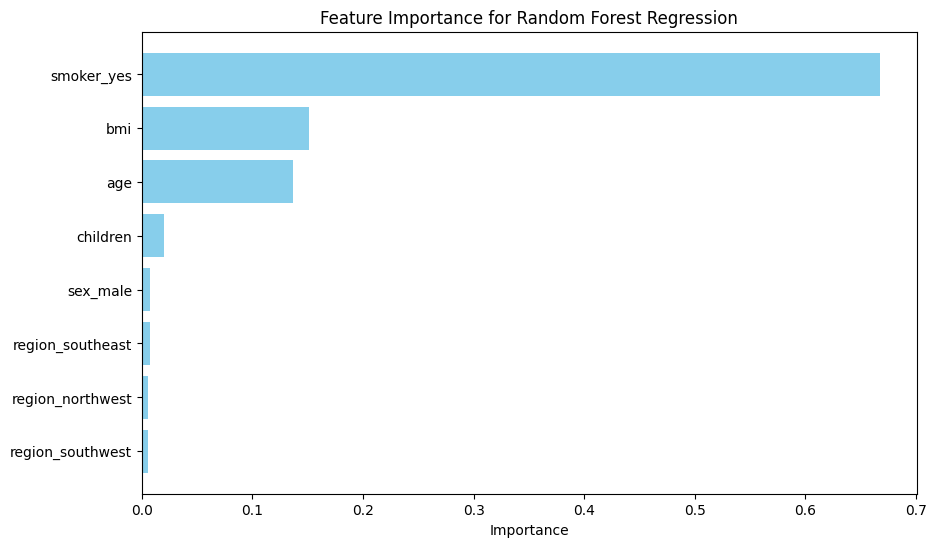

In [13]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Best parameters from Randomized Search
best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'log2'
}

# Fitting the Random Forest regressor with the best parameters
regressor = RandomForestRegressor(random_state=23, **best_params)
regressor.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error with best parameters: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest Regression')
plt.show()

The results show us that the model highlights smoking status as the dominant factor influencing the target variable (charges), with BMI and age also contributing significantly. The other features, particularly those related to family structure and region, appear to have a limited impact on the model's predictions. We can also add that the model perfoms well with the r-squared value equivalent to 83%.

We shall continue doing the same but with the XGBoost method, both in the classification and regression cases.

## 4.2. Regression Methods<a name="Regularization"></a>

In [14]:
##  XGBoost to predict whether a person is a smoker (classification)  ##

from xgboost import XGBClassifier, XGBRegressor, plot_importance, plot_tree
import xgboost as xgb

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid search initialization
grid_search = GridSearchCV(XGBClassifier(random_state=23), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Prediction using the best estimator
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

# Accuracy calculation
Best_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {Best_accuracy:.2f}')

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Best cross-validation accuracy: 0.9681979728840332
Accuracy with best parameters: 0.97


With training set of 80% of the entire dataset and a testing set of 20%, we got as a result the following parameters: a maximum depth of 5, a 'colsample_bytree' of 1.0, a learning rate of 0.1, 1 as the minimum child weight, 150 as the number of estimators and a subsample of 0.8.

The results are remarquable since we have the cross-validation accuracy equal to 97% and the accuracy on the test set is 97% as well showing us that what we did on the training set is remarquably reproduced on the test set as well.

We shall now plot it.

Accuracy with best parameters: 0.96
            Feature  Importance
3           charges    0.650092
1               bmi    0.114631
0               age    0.051399
7          sex_male    0.043082
2          children    0.042220
4  region_northwest    0.038389
5  region_southeast    0.033473
6  region_southwest    0.026714


<Figure size 1000x600 with 0 Axes>

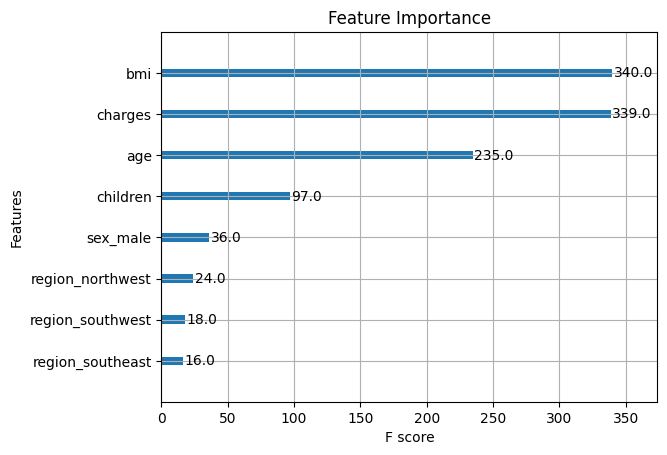

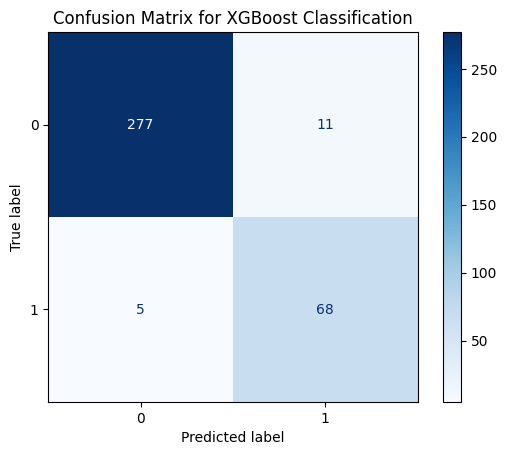

In [15]:
from xgboost import XGBClassifier, XGBRegressor, plot_importance, plot_tree
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=23)

# Best defined parameters
best_params = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 150,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 1.0
}

# Classification
classifier = XGBClassifier(**best_params)
classifier.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = classifier.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy:.2f}')

# Feature importance
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

plt.figure(figsize=(10, 6))
plot_importance(classifier, importance_type='weight', title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classification')
plt.show()

As result, we can say that the model heavily relies on the charges feature to make predictions, with BMI and age providing additional but lower contributions. The other features, particularly those related to gender, family structure, and region, appear to have limited impact on the classification task at hand.

Moreover, the confusion matrix indicates us that: True Positives=68 (Predicted smokers who are actually smokers), True Negatives=277 (Predicted non-smokers who are actually non-smokers), False Positives=11 (Predicted smokers who are actually non-smokers) and False Negatives=5 (Predicted non-smokers who are actually smokers). All these indicators showed that the model did well and represent high accuracy and precision.

We shall now do the same but for the regression task.

In [16]:
##  XGBoost to predict the insurance charges (regression)  ##

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=23)

# Parameter grid definition
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search initialization
random_search = RandomizedSearchCV(
    XGBRegressor(random_state=23),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=23
)

random_search.fit(X_train, y_train)

# Best parameters and best cross-validation score
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best cross-validation MSE:", -random_search.best_score_)

# Prediction using the best estimator
best_regressor = random_search.best_estimator_
y_pred = best_regressor.predict(X_test)

# Mean Squared Error calculation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with best parameters: {mse:.2f}')

Best parameters from Randomized Search: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best cross-validation MSE: 19670758.876951583
Mean Squared Error with best parameters: 22179484.38


With training set of 78% of the entire dataset and a testing set of 22%, we got as a result the following parameters: a maximum depth of 3, a 'colsample_bytree' of 1.0, a learning rate of 0.1, 3 as the minimum child weight, 50 as the number of estimators and a subsample of 0.8.

The cross-validation mean-square of error is approximatively 22.2 million; the value is quite high but can be considered to be among the lowest ones considering the test we did and we shall continue and plot it.

Mean Squared Error: 22179484.38
R-squared: 0.84
            Feature  Importance
7        smoker_yes    0.841098
1               bmi    0.081711
0               age    0.041090
2          children    0.010945
3  region_northwest    0.007459
5  region_southwest    0.007036
6          sex_male    0.006330
4  region_southeast    0.004331


<Figure size 1000x600 with 0 Axes>

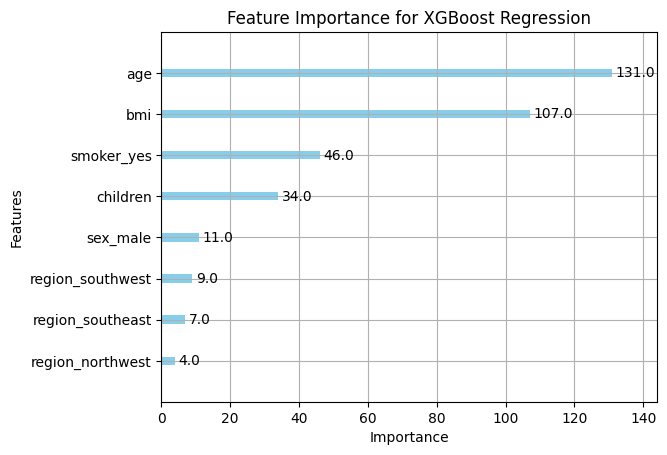

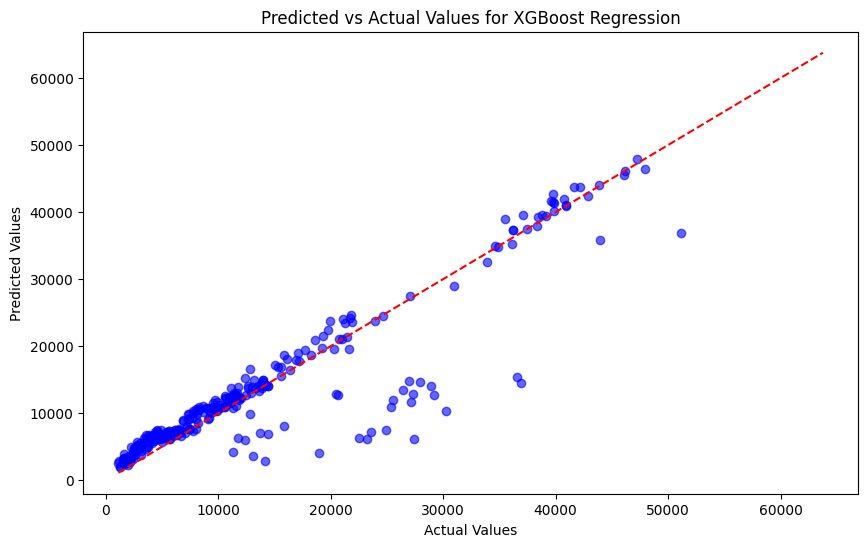

In [17]:
# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=23)

# Best parameters from Randomized Search
best_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 50,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 1.0
}

# Fitting the XGBoost regressor with the best parameters
regressor = XGBRegressor(random_state=23, **best_params)
regressor.fit(X_train, y_train)

# Predictions making and model evaluation
y_pred = regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(regressor,
                importance_type='weight',
                max_num_features=10,
                title='Feature Importance for XGBoost Regression',
                xlabel='Importance',
                ylabel='Features',
                color='skyblue')
plt.show()

# Plotting Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for XGBoost Regression')
plt.show()

As result we can see that the model kindly relies on the smoker feature to make predictions, with BMI and age providing additional but lesser contributions. The other features, particularly those related to family structure and geographic location, appear to have a limited impact on the model's predictions.

In the predicted versus actual values we observe a few points below the red line which can tell us that more parameter tuning can be done as it is a sign of overfitting.

Tuning hyperparameters in Random Forest models is essential for optimizing performance, as they directly impact model accuracy, overfitting, and training efficiency.

Key hyperparameters include:

*   the number of trees (n_estimators): which can enhance performance by reducing variance but increases training time and memory usage;
*   the maximum depth (max_depth): which controls tree complexity and helps mitigate overfitting;
*   the minimum samples split (min_samples_split): which prevents the model from capturing overly specific patterns;
*   the minimum samples leaf (min_samples_leaf): which can smooth the model and enhance training speed;
*   the maximum features (max_features), which influences the number of features considered for splits and affects both overfitting and training speed;
*   the subsample, which determines the fraction of data used for fitting individual trees and can enhance generalization.

But thanks to systematic methods like grid search or randomized search, we can facilitate the identification of optimal hyperparameter settings for a given dataset hence achieving an effective balance between high performance and resource management.

# 5. Neural Networks<a name="Clustering"></a>

In this section we shall use the same 'Clean_data' dataset and, for both the classification (smoker vs non-smoker) and the regression (charges), firstly build a simple feedforward neural network before compare performance with the ensemble tree methods and baseline decision trees.

We shall as well compare performance with the ensemble tree methods and baseline decision trees before ending by highlighting possible advantages or disadvantages of neural networks compared to tree-based models.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.1072 
Test Accuracy: 0.97


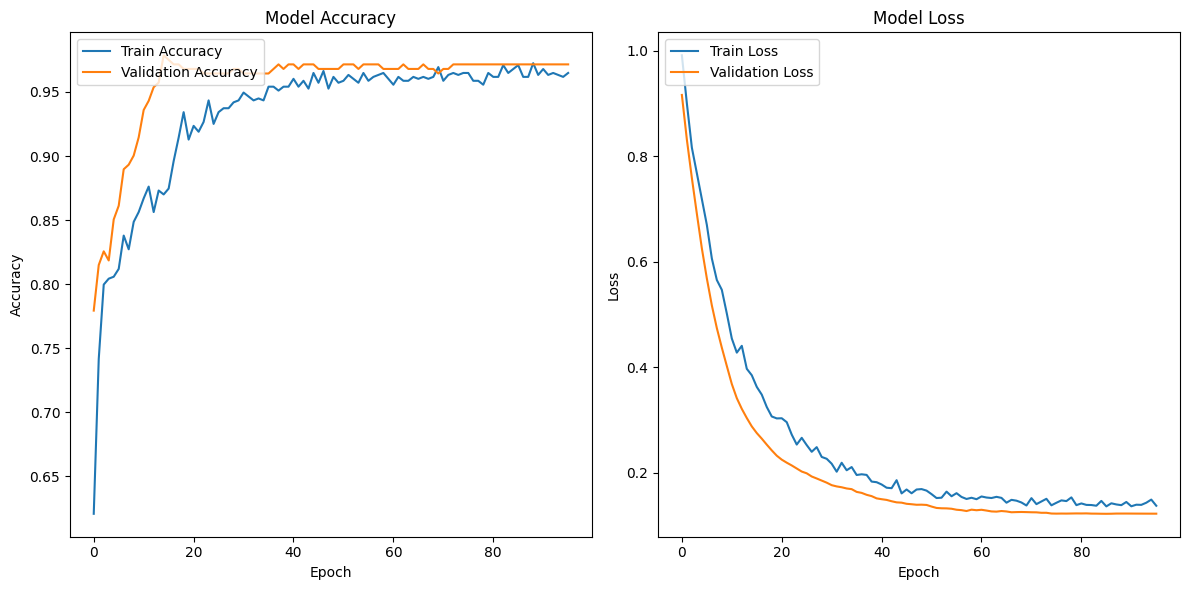

In [225]:
## Neural networks to predict whether a person is a smoker (classification) ##

# Setting random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Split the dataset into features and target variable
X = Clean_Data.drop(['smoker_yes'], axis=1)
y = Clean_Data['smoker_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))  # Initial layer
model.add(Dropout(0.4))  # Regularization to reduce overfitting
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))  # Second hidden layer
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.000001)

# Training the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=30,
                    validation_split=0.3,
                    verbose=0,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

# Plotting training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

The results shown above are quite good with a test accuracy of 97% and as seen on the graphs, very small differences between the training and the testing sets which is a very good sign.

Compared to the ensemble tree methods and baseline decision trees, they all have good test accuracy (97%) however the neural networks are quite unstable and not easy to interpret

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37553640.0000 - mean_absolute_error: 4083.7104 
Test Mean Absolute Error: 3924.04


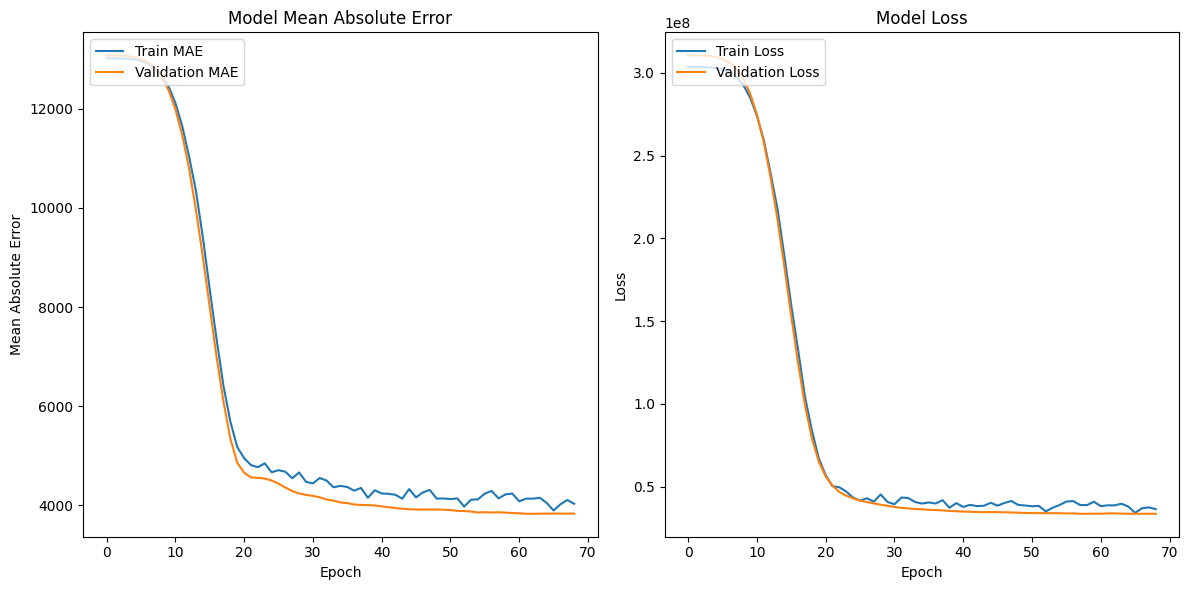

In [226]:
##  Neural networks to predict the insurance charges (regression)  ##

# Setting random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Split the dataset into features and target variable
X = Clean_Data.drop(['charges'], axis=1)
y = Clean_Data['charges']

# Split the data into training and testing sets with a fixed random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001))) # Initial layer
model.add(Dropout(0.3))  # Regularization to reduce overfitting
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # Second layer
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))  # Third layer
model.add(Dense(1))

# Model compilation
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.000001)

# Model training
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_split=0.3,
                    verbose=0,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {mae:.2f}')

# Plotting training history
plt.figure(figsize=(12, 6))

# Plot training & MAE values' validation
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & loss values validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

The graphs above indicate that the model did a good job where the differences between the training and the testing sets are extremily low in addition to the low information loss on both sets.

Compared to the ensemble tree methods and baseline decision trees, it is difficult to point out anything in particular other than the fact that it is extremely hard to tune the neural network model in addition to its high volatility and complexe interpretation.

Neural networks excel in processing large datasets and uncovering complex patterns that simpler models might overlook, offering a competitive advantage in cases with numerous features. However, their complexity makes them less interpretable than tree-based models, which can pose challenges for stakeholders in understanding decision-making processes, particularly in actuarial and/or data science settings.

# 6. Conclusion<a name="Conclusion"></a>

In conclusion, the comprehensive analysis of the "Medical Cost Personal Datasets" highlights the strengths and weaknesses of various modeling techniques for predicting insurance charges and smoking status.

Decision trees provide clarity and interpretability, while ensemble methods like Random Forests and boosting techniques significantly enhance predictive performance.
Neural networks, while powerful, introduce complexities regarding interpretability.

This assignment underscores the importance of selecting models that not only perform well but also align with the interpretability requirements of the actuarial and/or data science field. Understanding these relationships and model behaviors is crucial for making informed decisions in insurance pricing and risk assessment.